In [26]:
import pandas as pd
import numpy as np

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
cab=pd.read_csv('C:/Users/jagth/Desktop/Case_Study/Case_Study/Cab_Data.csv')
city=pd.read_csv('C:/Users/jagth/Desktop/Case_Study/Case_Study/City.csv')
cust=pd.read_csv('C:/Users/jagth/Desktop/Case_Study/Case_Study/Customer_ID.csv')
trans=pd.read_csv('C:/Users/jagth/Desktop/Case_Study/Case_Study/Transaction_ID.csv')

In [70]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
Transaction ID    1998 non-null int64
Date of Travel    1998 non-null object
Company           1998 non-null object
City              1998 non-null object
KM Travelled      1998 non-null float64
Price Charged     1998 non-null float64
Cost of Trip      1998 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 109.4+ KB


In [71]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
City          20 non-null object
Population    20 non-null object
Users         20 non-null object
dtypes: object(3)
memory usage: 608.0+ bytes


In [72]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
Customer ID           49171 non-null int64
Gender                49171 non-null object
Age                   49171 non-null int64
Income (USD/Month)    49171 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [73]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
Transaction ID    1999 non-null int64
Customer ID       1999 non-null int64
Payment_Mode      1999 non-null object
dtypes: int64(2), object(1)
memory usage: 47.0+ KB


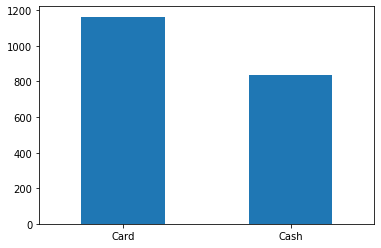

In [74]:
trans.Payment_Mode.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [75]:
cust_trans=pd.merge(trans,cust,on='Customer ID')
cust_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 0 to 1998
Data columns (total 6 columns):
Transaction ID        1999 non-null int64
Customer ID           1999 non-null int64
Payment_Mode          1999 non-null object
Gender                1999 non-null object
Age                   1999 non-null int64
Income (USD/Month)    1999 non-null int64
dtypes: int64(4), object(2)
memory usage: 109.3+ KB


In [76]:
cust_trans.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10000012,27703,Card,Male,27,9237
2,10000013,28712,Cash,Male,53,11242
3,10000014,28020,Cash,Male,23,23327
4,10000015,27182,Card,Male,33,8536


In [77]:
new_cab=pd.merge(cust_trans,cab,on='Transaction ID')
new_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558 entries, 0 to 1557
Data columns (total 12 columns):
Transaction ID        1558 non-null int64
Customer ID           1558 non-null int64
Payment_Mode          1558 non-null object
Gender                1558 non-null object
Age                   1558 non-null int64
Income (USD/Month)    1558 non-null int64
Date of Travel        1558 non-null object
Company               1558 non-null object
City                  1558 non-null object
KM Travelled          1558 non-null float64
Price Charged         1558 non-null float64
Cost of Trip          1558 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 158.2+ KB


In [78]:
new_cab.describe()

,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip
count,1.558000e+03,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,1.000101e+07,19444.908216,34.886393,14872.437099,22.637599,478.152125,284.634846
std,5.833350e+02,20377.418986,12.668717,7953.293530,12.278440,303.512623,157.573756
min,1.000001e+07,8.000000,18.000000,2035.000000,1.900000,22.200000,19.380000
25%,1.000054e+07,3975.250000,24.000000,8145.250000,12.100000,227.190000,149.870500
50%,1.000093e+07,7631.500000,32.000000,14635.500000,22.400000,440.085000,280.119000
75%,1.000148e+07,33780.000000,41.000000,20797.250000,32.995000,687.887500,417.469000
max,1.000201e+07,59965.000000,65.000000,34968.000000,47.600000,1544.450000,662.688000


In [79]:
new_cab['profit']=new_cab['Price Charged']-new_cab['Cost of Trip']
new_cab['ppkm']=new_cab['Price Charged']/new_cab['KM Travelled']
new_cab['cpkm']=new_cab['Cost of Trip']/new_cab['KM Travelled']
new_cab['profitkm']=new_cab['ppkm']-new_cab['cpkm']

In [124]:
new_cab['Date of Travel']=pd.to_datetime(new_cab['Date of Travel'])

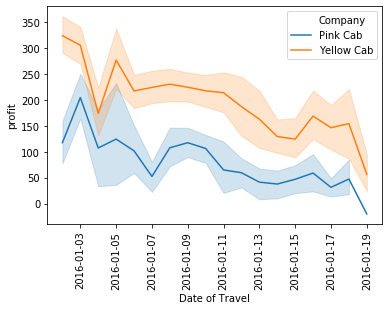

In [85]:
sns.lineplot(x=new_cab['Date of Travel'],y=new_cab['profit'],hue=new_cab['Company'])
plt.xticks(rotation=90)
plt.show()

In [86]:
pd.crosstab(index=new_cab['Date of Travel'],columns=new_cab['Company'],values=new_cab['Transaction ID'],aggfunc='count')

Company,Pink Cab,Yellow Cab
Date of Travel,,
2016-01-02,41,140
2016-01-03,52,126
2016-01-04,4,21
2016-01-05,6,41
2016-01-06,23,86
2016-01-07,24,117
2016-01-08,21,90
2016-01-09,57,137
2016-01-10,67,104


In [88]:
new_cab['Date of Travel'].value_counts()

2016-01-09    194
2016-01-02    181
2016-01-03    178
2016-01-10    171
2016-01-07    141
2016-01-08    111
2016-01-06    109
2016-01-11     70
2016-01-14     59
2016-01-12     55
2016-01-15     54
2016-01-05     47
2016-01-17     45
2016-01-16     43
2016-01-13     41
2016-01-18     30
2016-01-04     25
2016-01-19      4
Name: Date of Travel, dtype: int64

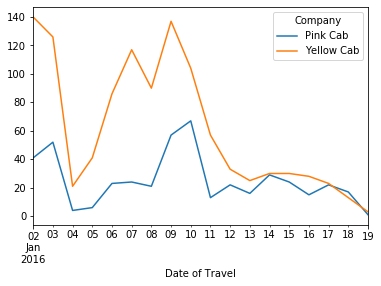

In [89]:
pd.crosstab(index=new_cab['Date of Travel'],columns=new_cab['Company'],values=new_cab['Transaction ID'],aggfunc='count').plot()

As a result of biasness in the data as in we have smaller sample of pink cabs when compared to yellow cabs, at any given time period yellow cab has maximum no of cabs

Although by looking at the trend we can also say that no of customers fall as the month end approaches and hence on 18th of the month pink cab customer count increases when compared to yellow cabs

In [90]:
yellow=new_cab[new_cab['Company']=='Yellow Cab']
pink=new_cab[new_cab['Company']=='Pink Cab']

In [91]:
import scipy.stats as stats

In [92]:
stats.ttest_ind(yellow['profitkm'],pink['profitkm'])

Ttest_indResult(statistic=24.9204228252716, pvalue=1.267323970767422e-115)

In [93]:
stats.ttest_ind(yellow['profit'],pink['profit'])

Ttest_indResult(statistic=15.147020594340997, pvalue=1.8908630848987897e-48)

Well when we look at profit per km and profit totally earned by the companies statistically it is clear that they have sigificant difference in the profits they earn

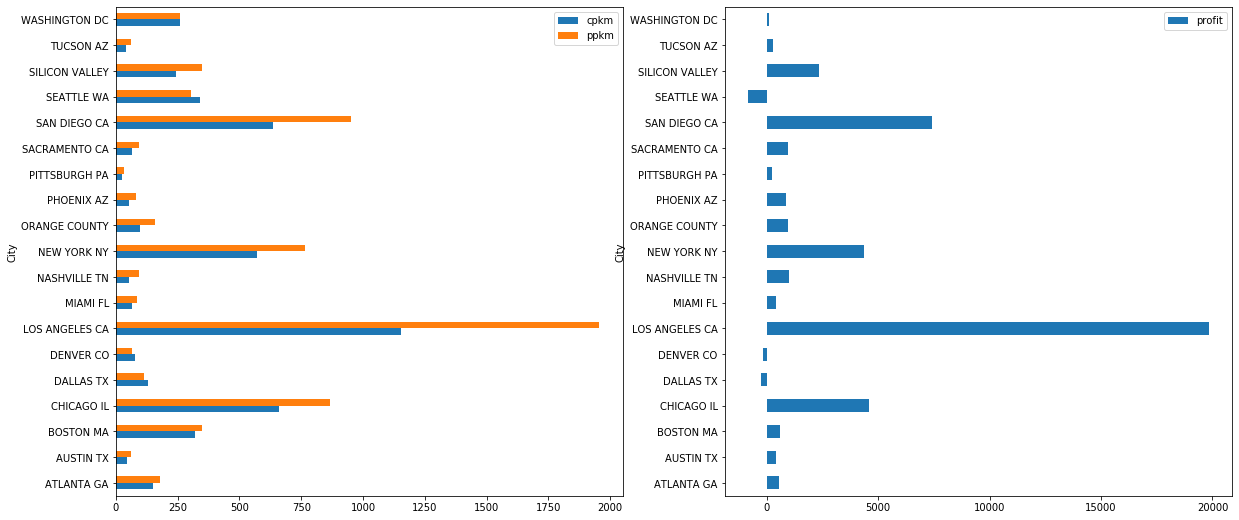

In [120]:
a,b=plt.subplots(1,2,figsize=(20,9))
pink.groupby(['City'])[['cpkm','ppkm']].sum().plot(kind='barh',ax=b[0])
pink.groupby('City')[['profit']].sum().plot(kind='barh',ax=b[1])

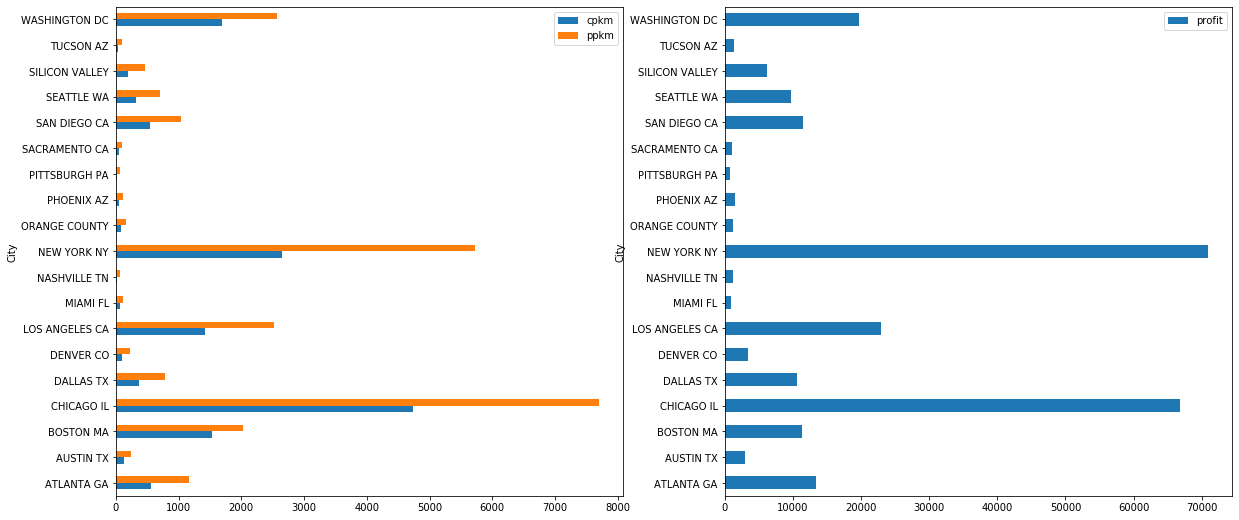

In [123]:
c,b=plt.subplots(1,2,figsize=(20,9))
yellow.groupby(['City'])[['cpkm','ppkm']].sum().plot(kind='barh',ax=b[0])
yellow.groupby('City')[['profit']].sum().plot(kind='barh',ax=b[1])

Well by the above visualzation, it can be said that pink cab price over cost is lesser than that of yellow i.e; pink cab charges price almost equal to the cost incurred, where as yellow cab charges much higher over cost incurred which makes it earn a higher profit than pink cab in every state

Hence, with the increase in number of customers the margin also increases for yellow cab than pink cab
Pink cab is more prone to make losses in the few of the states where it is already making losses.

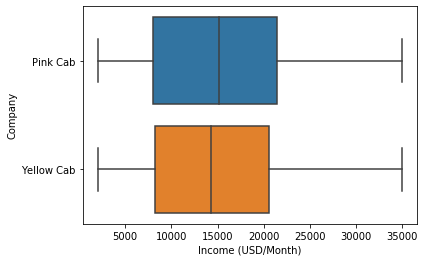

In [136]:
sns.boxplot(new_cab['Income (USD/Month)'],y=new_cab['Company'])

In [138]:
stats.ttest_ind(yellow['Income (USD/Month)'],pink['Income (USD/Month)'])

Ttest_indResult(statistic=-1.1651112095098741, pvalue=0.24415256206871813)

Here statistically it is clear that the income range of individuals or customers opting both the companies are almost around same

In [202]:
new_cab['new']=0
for i in new_cab.Age.index:
    if new_cab['Age'].iloc[i] in range(0,21):
        new_cab.new[new_cab['Age']==new_cab.Age.iloc[i]]='0-20'
    elif new_cab.Age.iloc[i] in range(21,41):
        new_cab.new[new_cab['Age']==new_cab.Age.iloc[i]]='21-40'
    elif new_cab.Age.iloc[i] in range(41,61):
        new_cab.new[new_cab['Age']==new_cab.Age.iloc[i]]='41-60'
    elif new_cab.Age.iloc[i] in range(61,81):
        new_cab.new[new_cab['Age']==new_cab.Age.iloc[i]]='61-80'
    else:
        new_cab.new[new_cab['Age']==new_cab.Age.iloc[i]]='81-100'

C:\Users\jagth\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


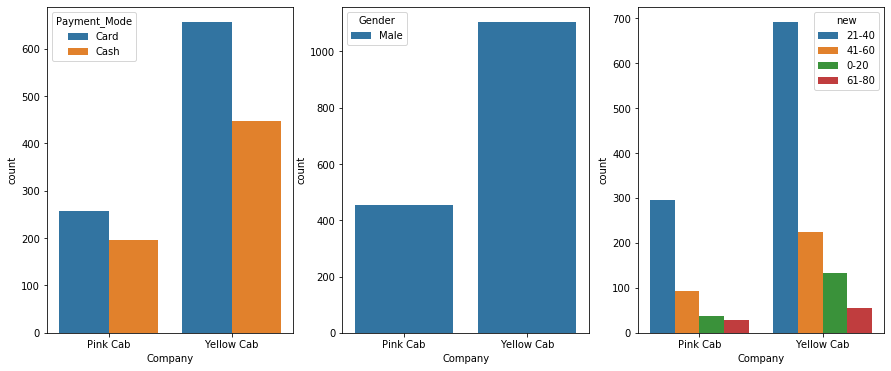

In [211]:
d,b=plt.subplots(1,3,figsize=(15,6))
sns.countplot(hue=new_cab['Payment_Mode'],x=new_cab['Company'],ax=b[0])
sns.countplot(hue=new_cab['Gender'],x=new_cab['Company'],ax=b[1])
sns.countplot(hue=new_cab['new'],x=new_cab['Company'],ax=b[2])

Customers mostly prefer card payment mode over cash irrespective of the company.
As only the transactions made data was picked for the margin estimation of both the companies, we found only male customer transactions.
Young individuals are the higher contributors to the business followed by middle aged individuals.

## Conclusion:

Hence for short run, immediate returns yellow cab is a better option to invest
    And for longer run, Pink cab is a considerable option to invest as even with baised data pink cab shows almost considerable amount of similarity to yellow cabs. Only disadvantage here is the company is making losses in few states but as its charging almost equal or lesser than the cost incurred. Well to assume, pink cab can be a new company in the field trying to gain customer trust which might start making profits in near future as customers in every income range opt for pink cabs and also the same age range pattern is seen in the pink cabs.
    This assumption also supports the biasness in the data.